## Bibliotekos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Duomenų importavimas

In [27]:
df = pd.read_csv('pardavimai-duomenys.csv')

df.columns = [
    'Product_Count', 'Order_Price', 'Buyer', 'Buyer_City',
    'Order_Status', 'Shipping_Price', 'Order_Date',
    'Order_Time', 'Type', 'Buyer_Satisfaction'
]

pd.concat([df.head(), df.tail()])

,Product_Count,Order_Price,Buyer,Buyer_City,Order_Status,Shipping_Price,Order_Date,Order_Time,Type,Buyer_Satisfaction
0,1,4.99,Marius Marius,Raseiniai,patvirtintas,2.99,2021-05-18,12:41,internetu,3
1,1,14.99,Aurimas Aurimaitė,Šilutė,pristatytas,9.99,2014-11-11,11:36,parduotuvėje,4
2,1,9.99,Aldona Aldonaitė,Kupiškis,pristatytas,2.99,2019-04-15,14:33,internetu,1
3,2,59.98,Aurimas Aurimaitė,Zarasai,pristatytas,9.99,2018-02-27,9:53,internetu,5
4,2,22.98,Bronius Bronius,Zarasai,pristatytas,2.99,2017-08-15,14:4,internetu,5
9995,4,30.96,Rita Ritaitė,Kaišiadorys,pristatytas,2.99,2015-03-13,15:45,internetu,5
9996,4,94.96,Kazimieras Kazimieraitis,Telšiai,pristatytas,2.99,2019-04-16,12:29,internetu,3
9997,4,82.96,Aurimas Aurimaitė,Kaišiadorys,atšauktas,4.99,2022-03-17,15:1,internetu,3
9998,4,30.96,Vytautas Vytenis,Plungė,pristatytas,2.99,2019-04-07,9:52,internetu,3
9999,3,54.97,Asta Astaitė,Tauragė,pristatytas,2.99,2024-01-13,13:58,internetu,5


## Diagramos

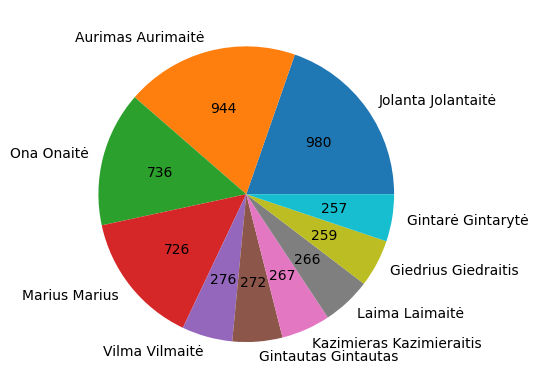

In [28]:
new_table = df.groupby('Buyer').count()['Product_Count'].sort_values(ascending=False).head(10)
new_table

plt.pie(new_table, labels=new_table.index, autopct=lambda p: f'{p*sum(new_table)/100 :.0f}')
plt.show()

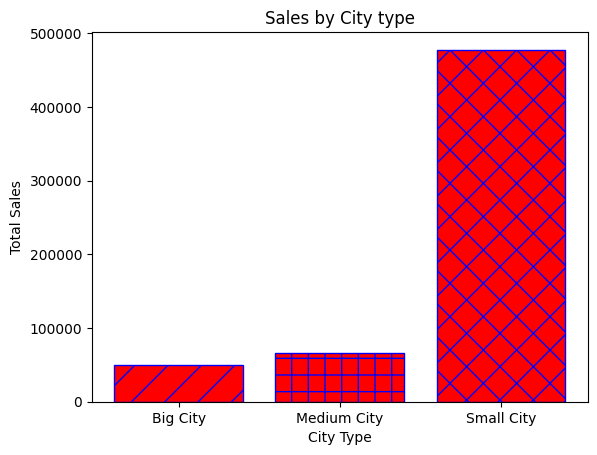

In [34]:
def city_type(row):
  if row['Buyer_City'] in ['Vilnius', 'Kaunas', 'Klaipėda']:
    return 'Big City'
  elif row['Buyer_City'] in ['Šiauliai', 'Panevėžys', 'Alytus', 'Marijampolė', 'Mažeikiai', 'Jonava', 'Utena']:
    return 'Medium City'
  else:
    return 'Small City'

df['city_type'] = df.apply(city_type, axis=1)
df.head(5)

df['Whole_price'] = df['Order_Price'] + df['Shipping_Price']
df.head(5)

grouped_sales = df.groupby('city_type').sum()['Whole_price']
grouped_sales

plt.bar(grouped_sales.keys(), grouped_sales)
plt.title('Sales by City type')
plt.xlabel('City Type')
plt.ylabel('Total Sales')

bars = plt.bar(grouped_sales.keys(), grouped_sales, color = 'red', edgecolor='blue')
bars[0].set_hatch('/')
bars[1].set_hatch('+')
bars[2].set_hatch('x')


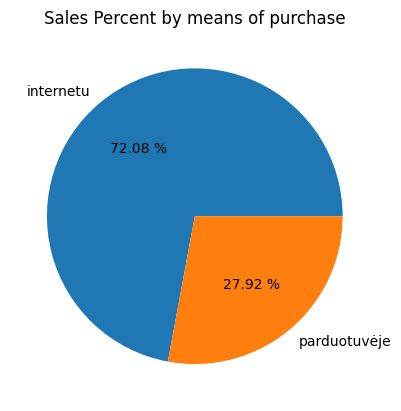

In [38]:
grouped_type = df.groupby('Type').sum()['Product_Count']
grouped_type

plt.pie(grouped_type, labels=grouped_type.keys(), autopct='%.2f %%')
plt.title('Sales Percent by means of purchase')
plt.show()

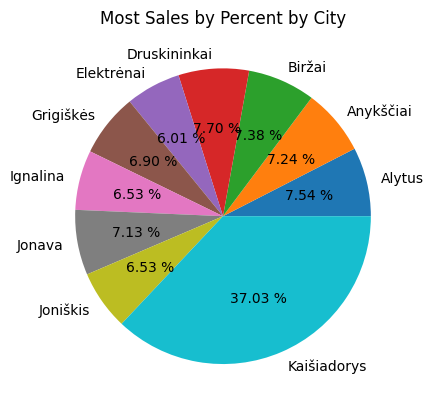

In [39]:
grouped_cities = df.groupby('Buyer_City').sum()['Product_Count'].head(10)
grouped_cities

plt.pie(grouped_cities, labels=grouped_cities.keys(), autopct='%.2f %%')
plt.title('Most Sales by Percent by City')
plt.show()

In [ ]:
df[df['Buyer_City'] == 'Kaišiadorys']

,Product_Count,Order_Price,Buyer,Buyer_City,Order_Status,Shipping_Price,Order_Date,Order_Time,Type,Buyer_Satisfaction
10,4,44.96,Vitalijus Vitkus,Kaišiadorys,pristatytas,4.99,2020-12-31,15:10,internetu,5
22,1,14.99,Jolanta Jolantaitė,Kaišiadorys,pristatytas,19.99,2021-05-08,15:7,parduotuvėje,5
29,5,124.95,Aidas Aidaitis,Kaišiadorys,išsiųstas,4.99,2016-07-10,12:26,internetu,4
30,2,12.98,Ona Onaitė,Kaišiadorys,pristatytas,2.99,2024-05-23,8:50,internetu,5
36,2,55.98,Jonas Jonaitis,Kaišiadorys,pristatytas,4.99,2023-07-01,12:51,internetu,4
...,...,...,...,...,...,...,...,...,...,...
9987,1,29.99,Rimantas Rimantėlis,Kaišiadorys,pristatytas,19.99,2017-10-30,13:48,internetu,4
9989,2,35.98,Jurgis Jurgis,Kaišiadorys,pristatytas,0.00,2018-02-26,8:28,internetu,4
9990,4,53.96,Ona Onaitė,Kaišiadorys,pristatytas,2.99,2020-08-18,10:8,internetu,5
9995,4,30.96,Rita Ritaitė,Kaišiadorys,pristatytas,2.99,2015-03-13,15:45,internetu,5


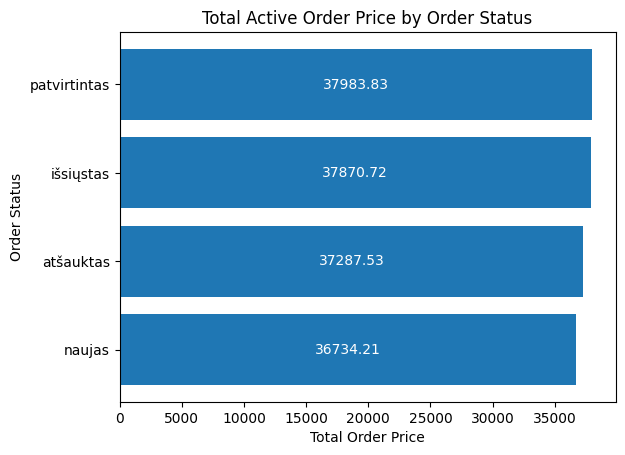

In [42]:
filtered_sales = df[df['Order_Status'] != 'pristatytas']
grouped_status = filtered_sales.groupby('Order_Status').sum()['Order_Price']
grouped_status = grouped_status.sort_values()

bars = plt.barh(grouped_status.index, grouped_status.values)

for bar, value in zip(bars, grouped_status.values):
    plt.text(
        value / 2,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}',
        ha='center',
        va='center',
        color='white',
        fontsize=10
    )

plt.xlabel('Total Order Price')
plt.ylabel('Order Status')
plt.title('Total Active Order Price by Order Status')
plt.show()